In [1]:
import pandas as pd
import numpy as np
import missingno as msno 

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',100)

In [2]:
mi = pd.read_csv('Myocardial infarction complications Database.csv')
mi.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,...,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,138.0,NaN,NaN,NaN,8.0,16.0,4.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.38,0.18,NaN,7.8,3.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,100.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,132.0,0.30,0.11,NaN,10.8,NaN,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.9,0.0,146.0,0.75,0.37,NaN,NaN,NaN,2.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.0,100.0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.45,0.22,NaN,8.3,NaN,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
mi.tail()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,...,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,110.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.7,0.0,130.0,1.05,0.52,NaN,12.8,6.0,2.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,50.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,1.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,70.0,50.0,0.0,NaN,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.23,0.15,NaN,8.3,13.0,1.0,2.0,0.0,0.0,NaN,NaN,NaN,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,7.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,110.0,70.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.1,0.0,136.0,0.45,0.45,NaN,7.5,4.0,2.0,1.0,NaN,NaN,1.0,0.0,1.0,1.0,2.0,NaN,NaN,1.0,NaN,NaN,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,1
1699,1700,63.0,1,2.0,NaN,NaN,NaN,NaN,2.0,0.0,NaN,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1


### Create binary target feature

In [4]:
# The last 12 columns are different types of complications occuring within one year of initial MI
# Any of these could be the target column, none have missing values

complications = list(mi.columns[-12:])

for comp in complications:
    print(f'{comp}:') 
    print(mi[comp].value_counts(normalize=True))

FIBR_PREDS:
0    0.9
1    0.1
Name: FIBR_PREDS, dtype: float64
PREDS_TAH:
0    0.988235
1    0.011765
Name: PREDS_TAH, dtype: float64
JELUD_TAH:
0    0.975294
1    0.024706
Name: JELUD_TAH, dtype: float64
FIBR_JELUD:
0    0.958235
1    0.041765
Name: FIBR_JELUD, dtype: float64
A_V_BLOK:
0    0.966471
1    0.033529
Name: A_V_BLOK, dtype: float64
OTEK_LANC:
0    0.906471
1    0.093529
Name: OTEK_LANC, dtype: float64
RAZRIV:
0    0.968235
1    0.031765
Name: RAZRIV, dtype: float64
DRESSLER:
0    0.955882
1    0.044118
Name: DRESSLER, dtype: float64
ZSN:
0    0.768235
1    0.231765
Name: ZSN, dtype: float64
REC_IM:
0    0.906471
1    0.093529
Name: REC_IM, dtype: float64
P_IM_STEN:
0    0.912941
1    0.087059
Name: P_IM_STEN, dtype: float64
LET_IS:
0    0.840588
1    0.064706
3    0.031765
7    0.015882
6    0.015882
4    0.013529
2    0.010588
5    0.007059
Name: LET_IS, dtype: float64


In [5]:
# How many people didn't have any complications?
# Or is there a number of complications that would be a good dividing line?

# Create a total complications feature that is the sum of all the complication features
# Note that because LET_IS has numbers 0-7 depending on cause of death, the numbers will
# not represent exactly the number of complications

mi['tot_comp'] = mi.loc[:, complications].sum(axis=1)
mi.head()
mi['tot_comp'].value_counts(normalize=True)

0     0.390000
1     0.352353
2     0.120000
3     0.038235
4     0.032353
5     0.020588
6     0.019412
7     0.012353
8     0.007647
9     0.004706
11    0.001176
10    0.001176
Name: tot_comp, dtype: float64

In [6]:
mi.groupby('tot_comp')[complications].sum()

,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
tot_comp,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0
1,63,5,15,25,17,38,0,40,192,35,104,65
2,51,6,9,11,19,65,0,18,111,47,26,45
3,22,5,5,7,9,29,0,5,41,39,15,18
4,6,1,6,8,2,10,36,8,11,11,2,119
5,5,0,2,4,4,6,9,2,17,5,0,121
6,10,0,1,1,2,6,9,1,11,7,0,150
7,4,0,0,1,1,2,0,0,5,8,0,126
8,2,1,0,7,0,2,0,0,2,3,1,86


There are many deaths ('LET_IS') in the group with only one complication, so I don't think separating strickly on number of complications will work. The deaths feature records the cause of death, many of which are also a separate complications feature. Perhaps these potentially fatal complications can be grouped with fatality as the target binary feature.

In [7]:
# How many people had complications that could lead to death or died
fatal_complications = ['FIBR_JELUD', 'OTEK_LANC', 'RAZRIV', 'ZSN', 'REC_IM', 'LET_IS']
mi['fatal_comp'] = mi.loc[:, fatal_complications].sum(axis=1)
mi.head()
mi['fatal_comp'].value_counts(normalize=True)

0    0.541176
1    0.278235
2    0.075882
4    0.028235
5    0.020000
6    0.017059
3    0.016471
7    0.011765
8    0.008235
9    0.002941
Name: fatal_comp, dtype: float64

In [8]:
# This looks promising as a relatively balanced feature
# The fatal complications feature needs to be binary, so replacing any number >0 with 1
mi['fatal_comp'] = np.where(mi['fatal_comp']>0, 1, 0)
mi['fatal_comp'].value_counts(normalize=True)

0    0.541176
1    0.458824
Name: fatal_comp, dtype: float64

In [9]:
# Separate the expanatory features from the target feature and drop the targets that 
# aren't being used
to_drop = complications + ['tot_comp']


mi = mi.drop(to_drop, axis=1)

In [10]:
mi.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,...,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,fatal_comp
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,138.0,NaN,NaN,NaN,8.0,16.0,4.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.38,0.18,NaN,7.8,3.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,100.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,132.0,0.30,0.11,NaN,10.8,NaN,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.9,0.0,146.0,0.75,0.37,NaN,NaN,NaN,2.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.0,100.0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.45,0.22,NaN,8.3,NaN,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0


### Null values

In [11]:
mi.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 113 columns):
ID               1700 non-null int64
AGE              1692 non-null float64
SEX              1700 non-null int64
INF_ANAM         1696 non-null float64
STENOK_AN        1594 non-null float64
FK_STENOK        1627 non-null float64
IBS_POST         1649 non-null float64
IBS_NASL         72 non-null float64
GB               1691 non-null float64
SIM_GIPERT       1692 non-null float64
DLIT_AG          1452 non-null float64
ZSN_A            1646 non-null float64
nr_11            1679 non-null float64
nr_01            1679 non-null float64
nr_02            1679 non-null float64
nr_03            1679 non-null float64
nr_04            1679 non-null float64
nr_07            1679 non-null float64
nr_08            1679 non-null float64
np_01            1682 non-null float64
np_04            1682 non-null float64
np_05            1682 non-null float64
np_07            1682 non-null float64
n

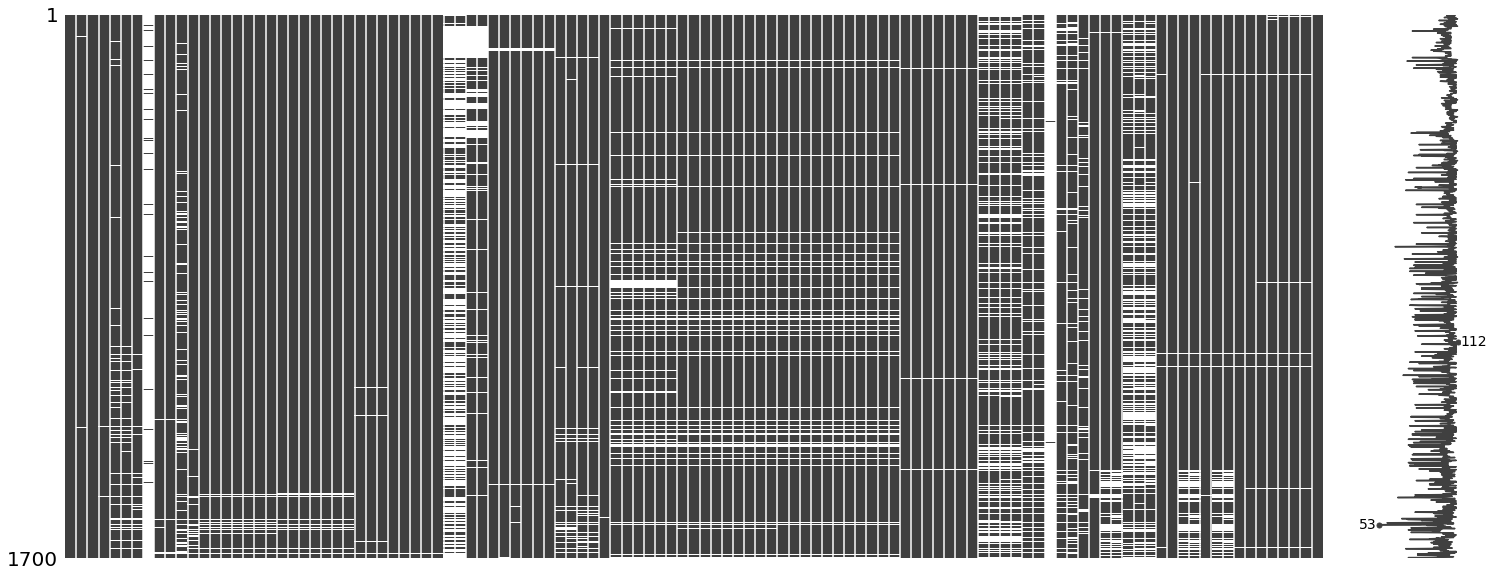

In [12]:
msno.matrix(mi)

In [13]:
# Almost all features have some null values, will look at them in groups of columns that relate to each other.

# First will drop the 'ID' (don't need), 'IBS_NASL' (family history; only 72 non-null values), and
# 'KFK_BLOOD' (serum CPK; only 4 non-null values) columns

mi = mi.drop(['ID','IBS_NASL', 'KFK_BLOOD'], axis=1)

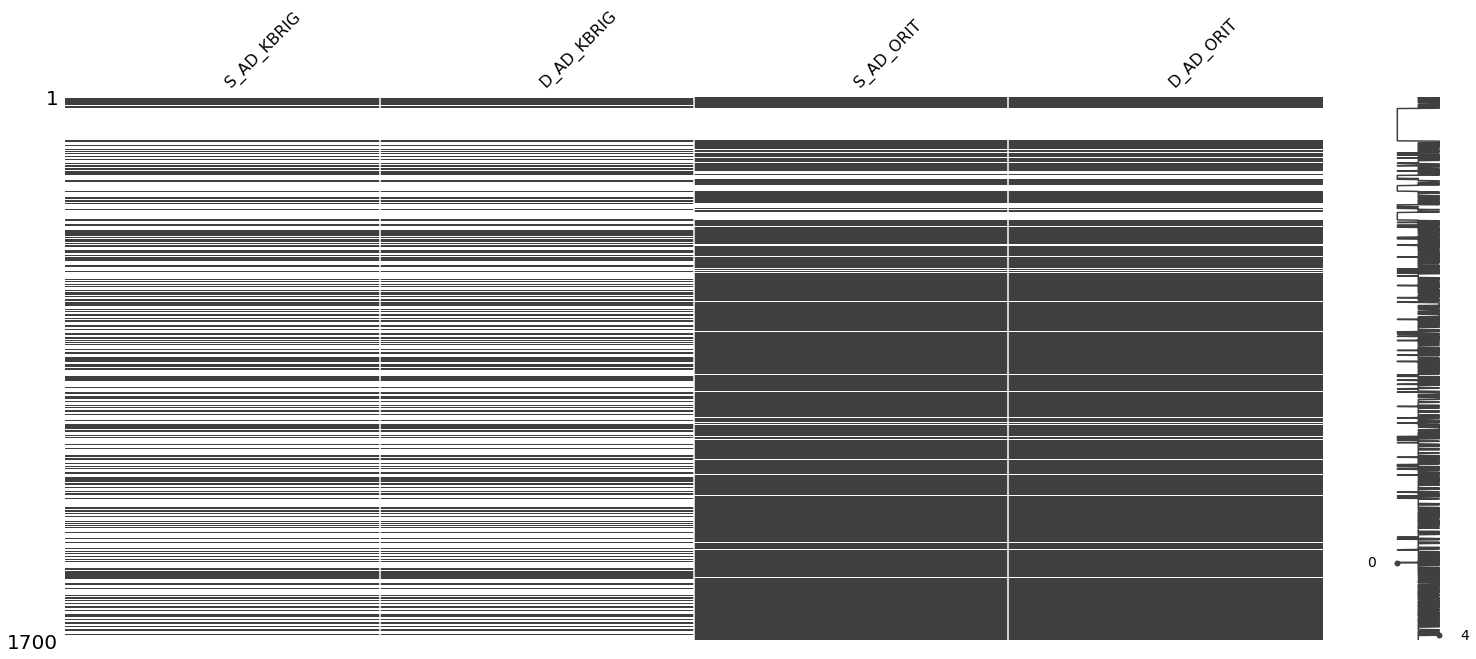

In [14]:
# There are two different place where blood pressure (S_ systolic and D_ diastolic) is taken-
# by the Emergency Cardiology team (_KBRIG) and by intensive care (_ORIT). The _KBRIG has 63% missing values

blood_pressure = ['S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT']
msno.matrix(mi[blood_pressure])

In [15]:
mi.loc[mi[blood_pressure].isna().all(axis=1)]

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,...,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,fatal_comp
37,59.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.90,0.41,5.4,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0
38,59.0,0,1.0,6.0,2.0,2.0,3.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.3,0.0,136.0,0.15,0.15,6.8,9.0,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1
39,78.0,0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,136.0,0.22,0.11,7.9,13.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1
40,73.0,0,0.0,3.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.1,0.0,136.0,NaN,NaN,6.5,15.0,7.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1
41,49.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.9,0.0,121.0,0.61,0.22,7.9,7.0,3.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,63.0,1,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,136.0,0.30,0.22,4.9,2.0,6.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1377,90.0,0,1.0,6.0,2.0,1.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0

In [16]:
mi[blood_pressure].loc[mi[['S_AD_KBRIG', 'D_AD_KBRIG']].isna().all(axis=1)].describe()

,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT
count,0.0,0.0,848.000000,848.000000
mean,NaN,NaN,134.846698,83.048349
std,NaN,NaN,30.250432,17.525324
min,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,120.000000,80.000000
50%,NaN,NaN,130.000000,80.000000
75%,NaN,NaN,150.000000,90.000000
max,NaN,NaN,260.000000,190.000000


In [17]:
mi[blood_pressure].describe()

,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT
count,624.000000,624.000000,1433.000000,1433.000000
mean,136.907051,81.394231,134.588276,82.749477
std,34.997835,19.745045,31.348388,18.321063
min,0.000000,0.000000,0.000000,0.000000
25%,120.000000,70.000000,120.000000,80.000000
50%,140.000000,80.000000,130.000000,80.000000
75%,160.000000,90.000000,150.000000,90.000000
max,260.000000,190.000000,260.000000,190.000000


In [18]:
mi['AD_KBRIG'] = np.where(mi['D_AD_KBRIG'].isna(), 0, 1)
bp = ['AD_KBRIG', 'S_AD_KBRIG', 'D_AD_KBRIG' ]
mi[bp]

,AD_KBRIG,S_AD_KBRIG,D_AD_KBRIG
0,0,NaN,NaN
1,0,NaN,NaN
2,1,150.0,100.0
3,0,NaN,NaN
4,1,190.0,100.0
...,...,...,...
1695,0,NaN,NaN
1696,0,NaN,NaN
1697,0,NaN,NaN
1698,0,NaN,NaN


In [19]:
mi = mi.drop(['S_AD_KBRIG', 'D_AD_KBRIG'], axis=1)

In [20]:
y = mi['fatal_comp']
X = mi.drop('fatal_comp', axis = 1)

#### Binary columns

First, I checked the value counts and number of null values for each column.

In [21]:
binary_columns = [x for x in X.columns if ((X[x].min()==0) & (X[x].max()==1))]

In [22]:
for col in binary_columns:
    print(f'{col}:')
    print(X[col].value_counts(normalize=True))
    print(f'Null values: {X[col].isna().sum()}')
    print(f'--------')

SEX:
1    0.626471
0    0.373529
Name: SEX, dtype: float64
Null values: 0
--------
SIM_GIPERT:
0.0    0.966312
1.0    0.033688
Name: SIM_GIPERT, dtype: float64
Null values: 8
--------
nr_11:
0.0    0.974985
1.0    0.025015
Name: nr_11, dtype: float64
Null values: 21
--------
nr_01:
0.0    0.997618
1.0    0.002382
Name: nr_01, dtype: float64
Null values: 21
--------
nr_02:
0.0    0.988684
1.0    0.011316
Name: nr_02, dtype: float64
Null values: 21
--------
nr_03:
0.0    0.979154
1.0    0.020846
Name: nr_03, dtype: float64
Null values: 21
--------
nr_04:
0.0    0.982728
1.0    0.017272
Name: nr_04, dtype: float64
Null values: 21
--------
nr_07:
0.0    0.999404
1.0    0.000596
Name: nr_07, dtype: float64
Null values: 21
--------
nr_08:
0.0    0.997618
1.0    0.002382
Name: nr_08, dtype: float64
Null values: 21
--------
np_01:
0.0    0.998811
1.0    0.001189
Name: np_01, dtype: float64
Null values: 18
--------
np_04:
0.0    0.998216
1.0    0.001784
Name: np_04, dtype: float64
Null values: 

In [23]:
#X['nr'] = X['nr_07'] + X['nr_08'] + X['nr_11'] + X['nr_01'] + X['nr_02'] + X['nr_03'] + X['nr_04']
#X['nr'].value_counts(normalize=True)

In [24]:
#X = X.drop(['nr_07','nr_08','nr_11','nr_01','nr_02','nr_03','nr_04'], axis=1)

In [25]:
#X['np'] = X['np_01'] + X['np_04'] + X['np_05'] + X['np_07'] + X['np_08'] + X['np_09'] + X['np_10'] 
#X['np'].value_counts(normalize=True)

In [26]:
#X = X.drop(['np_01','np_04','np_05','np_07','np_08','np_09','np_10'], axis=1)

In [27]:
#X['zab_leg'] = X['zab_leg_06'] + X['zab_leg_01'] + X['zab_leg_02'] + X['zab_leg_03'] + X['zab_leg_04'] 
#X['zab_leg'].value_counts(normalize=True)

In [37]:
#X = X.drop(['zab_leg_06','zab_leg_01','zab_leg_02','zab_leg_03','zab_leg_04'], axis=1 )

In [32]:
count = 0
for col in binary_columns:
    if X[col].value_counts(normalize=True)[0] > 0.95:
        count += 1
        print(f'{col}:')
        print(X[col].value_counts(normalize=True))
print(count)

SIM_GIPERT:
0.0    0.966312
1.0    0.033688
Name: SIM_GIPERT, dtype: float64
nr_11:
0.0    0.974985
1.0    0.025015
Name: nr_11, dtype: float64
nr_01:
0.0    0.997618
1.0    0.002382
Name: nr_01, dtype: float64
nr_02:
0.0    0.988684
1.0    0.011316
Name: nr_02, dtype: float64
nr_03:
0.0    0.979154
1.0    0.020846
Name: nr_03, dtype: float64
nr_04:
0.0    0.982728
1.0    0.017272
Name: nr_04, dtype: float64
nr_07:
0.0    0.999404
1.0    0.000596
Name: nr_07, dtype: float64
nr_08:
0.0    0.997618
1.0    0.002382
Name: nr_08, dtype: float64
np_01:
0.0    0.998811
1.0    0.001189
Name: np_01, dtype: float64
np_04:
0.0    0.998216
1.0    0.001784
Name: np_04, dtype: float64
np_05:
0.0    0.99346
1.0    0.00654
Name: np_05, dtype: float64
np_07:
0.0    0.999405
1.0    0.000595
Name: np_07, dtype: float64
np_08:
0.0    0.996433
1.0    0.003567
Name: np_08, dtype: float64
np_09:
0.0    0.998811
1.0    0.001189
Name: np_09, dtype: float64
np_10:
0.0    0.998216
1.0    0.001784
Name: np_10, dt

The majority of binary features are mostly zeros with some ones and small number of null values. To start, I will replace any null values in binary columns with zero. There are several features that I may come back to, depending on how well the models do.

##### To consider again later
The series of features that starts with 'n_pr_ecg_p_' are ECG findings at the time of admission and have the same 115 rows with null values. Similarly, features starting with 'ritm_ecg_p' have the same 152 rows containing null values.

'GIPO_K' & 'GIPER_NA' have high number of nulls and refer to missing blood work. 'NA_KB', 'NOT_NA_KB' & 'LID_KB' also have many nulls  and refer to medicines given by the Emergency Cardiac Team (it seems like the team would not neglect to mention giving a drug, so the zero for null is probably safe here). 

In [33]:
ordinal_columns = [x for x in X.columns if ((X[x].min()==0) & (X[x].max()<15))]
numeric_columns = [x for x in X.columns if (X[x].min()>0) | (X[x].max()>15)]

In [34]:
for col in numeric_columns:
    print(f'{col}: mean {X[col].mean(): .2f}, median {X[col].median()}, mode {X[col].mode()}')

AGE: mean  61.86, median 63.0, mode 0    63.0
dtype: float64
S_AD_ORIT: mean  134.59, median 130.0, mode 0    130.0
dtype: float64
D_AD_ORIT: mean  82.75, median 80.0, mode 0    80.0
dtype: float64
K_BLOOD: mean  4.19, median 4.1, mode 0    4.0
dtype: float64
NA_BLOOD: mean  136.55, median 136.0, mode 0    136.0
dtype: float64
ALT_BLOOD: mean  0.48, median 0.38, mode 0    0.15
dtype: float64
AST_BLOOD: mean  0.26, median 0.22, mode 0    0.15
dtype: float64
L_BLOOD: mean  8.78, median 8.0, mode 0    6.9
dtype: float64
ROE: mean  13.44, median 10.0, mode 0    5.0
dtype: float64
TIME_B_S: mean  4.68, median 4.0, mode 0    2.0
dtype: float64


In [25]:
pair_plot = numeric_columns+ ['fatal_comp']

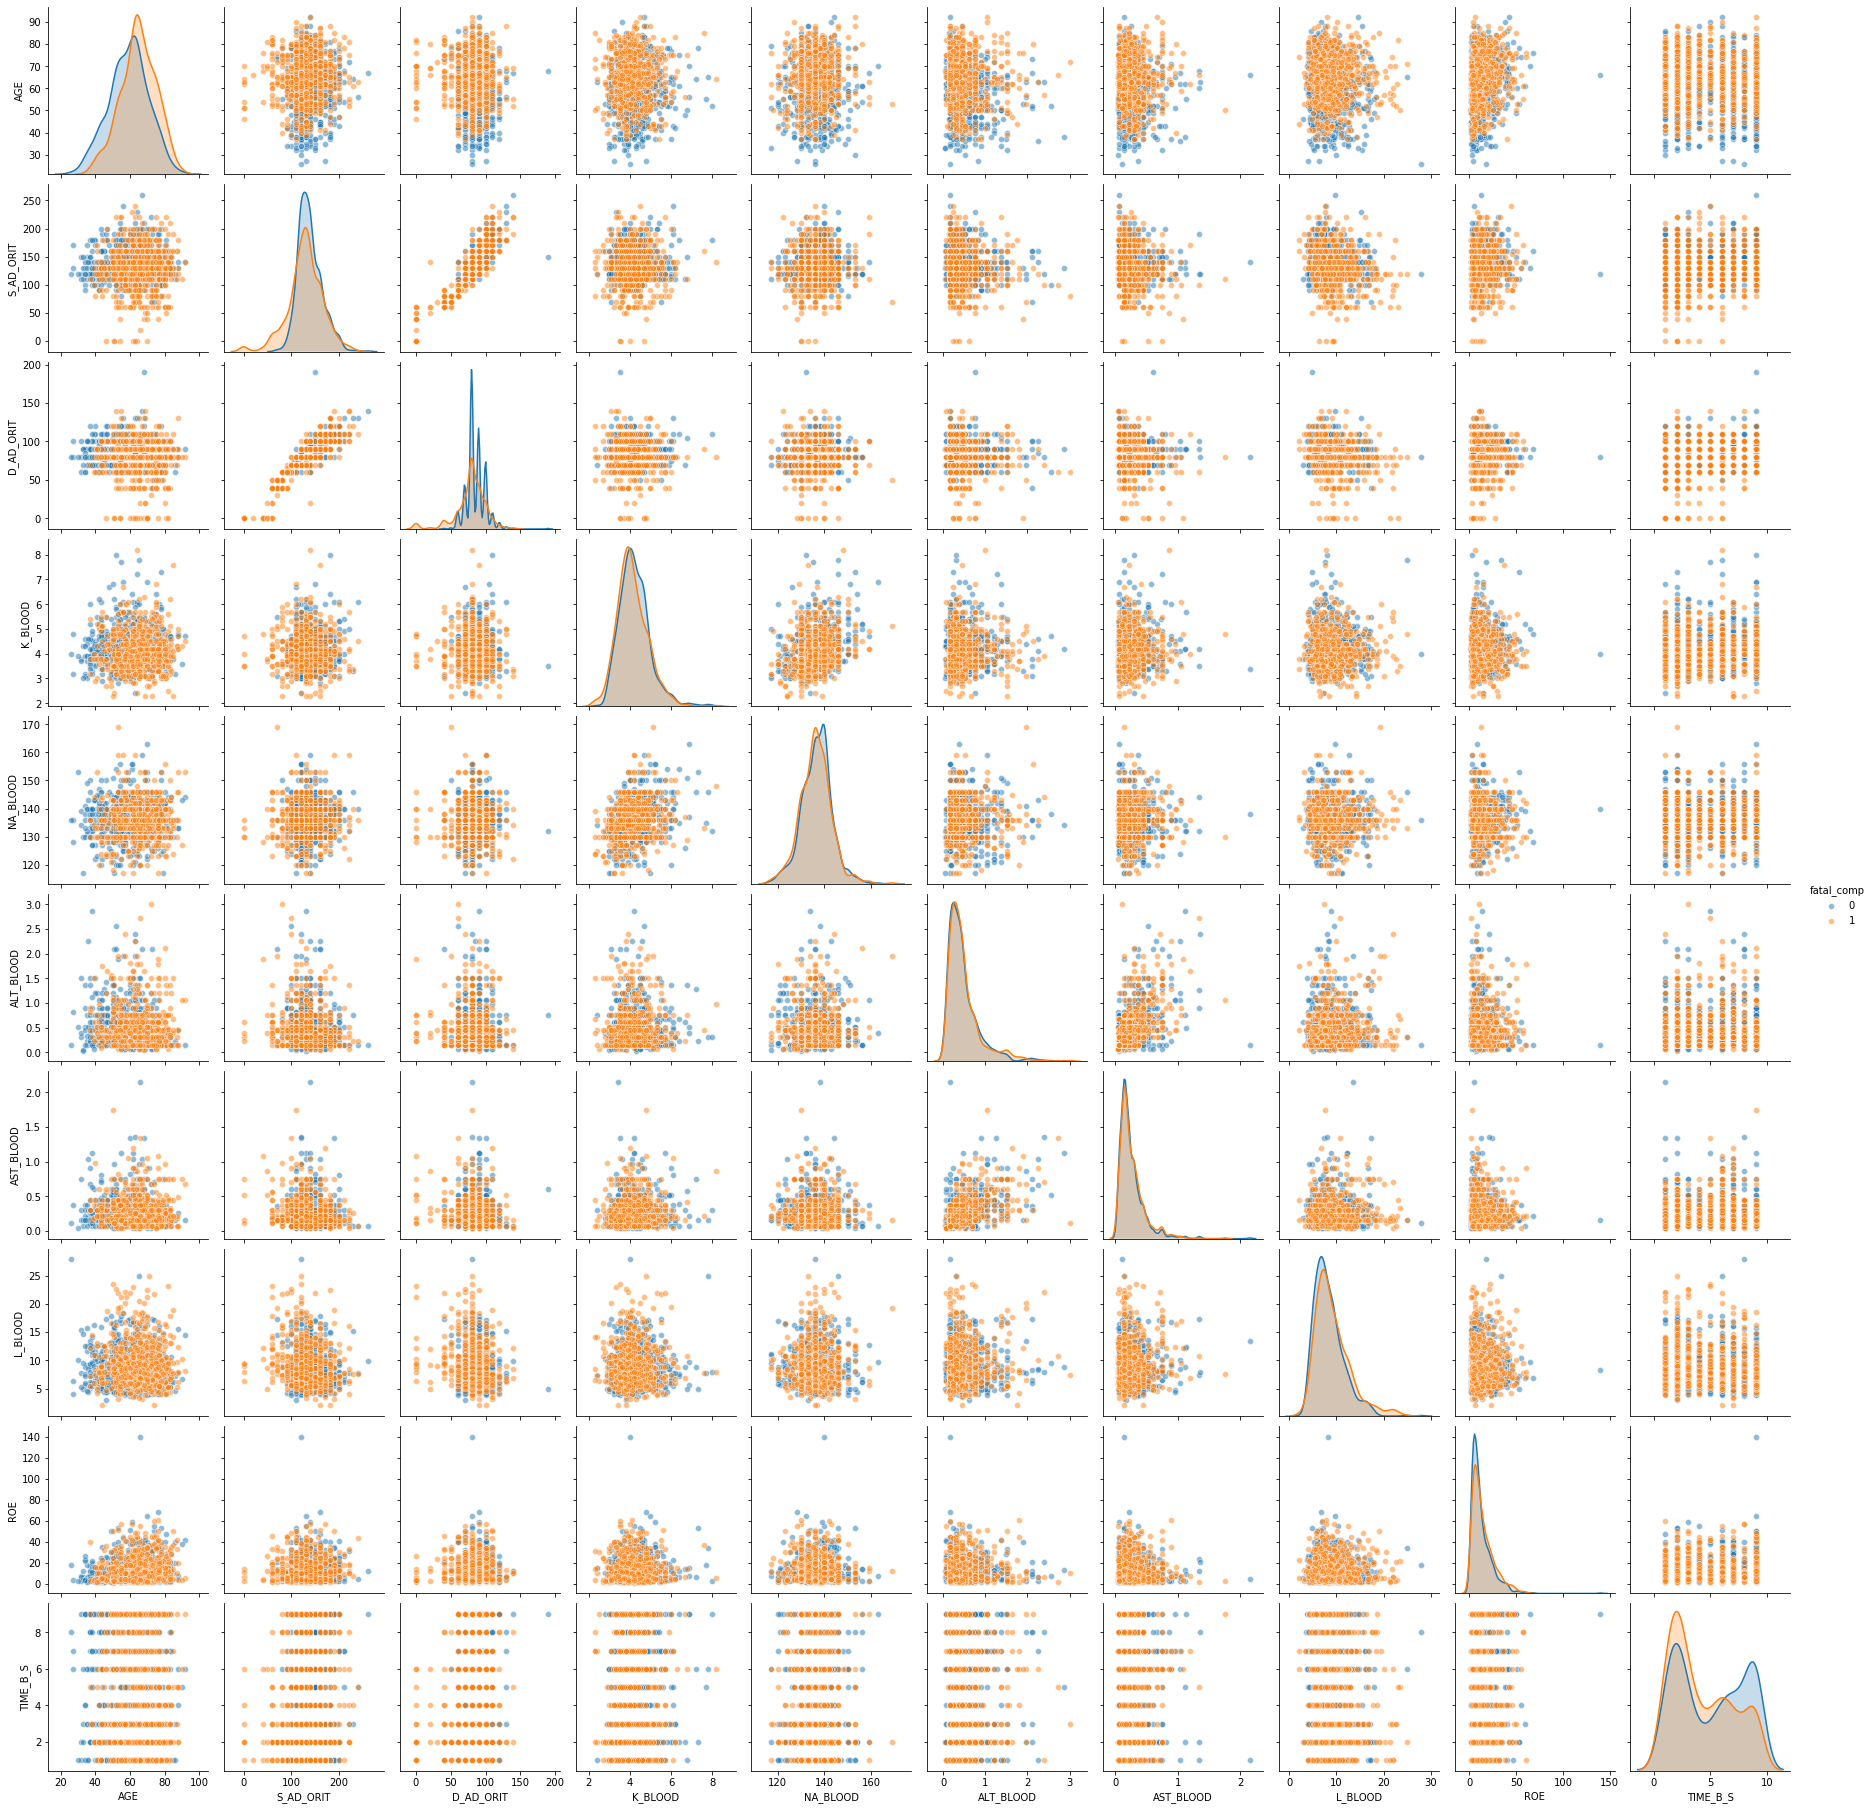

In [120]:
sns.pairplot(mi[pair_plot], hue='fatal_comp', plot_kws={'alpha':0.5})

### Correlations

In [27]:
corrMatrix = X.corr().abs()


s = corrMatrix.unstack()
so = pd.DataFrame(s.sort_values())



In [28]:
so.loc[(so[0] < 1) & (so[0]>=0.75)]

,,0
STENOK_AN,FK_STENOK,0.763019
FK_STENOK,STENOK_AN,0.763019
ritm_ecg_p_01,ritm_ecg_p_07,0.765292
ritm_ecg_p_07,ritm_ecg_p_01,0.765292
DLIT_AG,GB,0.775865
GB,DLIT_AG,0.775865
MP_TP_POST,ritm_ecg_p_02,0.845695
ritm_ecg_p_02,MP_TP_POST,0.845695
S_AD_ORIT,D_AD_ORIT,0.861266
D_AD_ORIT,S_AD_ORIT,0.861266


### Pipeline

Steps to full data processing
- create the target column
- delete unusable columns
- create indicator column for BP, drop other BP columns
- separate into binary, ordinal and numeric columns
- fill na values in binary and ordinal with 0
- fill na values in numeric with mode ??
- scale


In [35]:
from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer

from sklearn.model_selection import train_test_split

In [36]:
#y = mi['fatal_comp']
#X = mi.drop('fatal_comp', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)

In [37]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25, random_state=9)

In [38]:
imputer = IterativeImputer()
imputer.fit(X_train2)
X_train2_trans = imputer.transform(X_train2)
X_test2_trans = imputer.transform(X_test2)

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [39]:
binary_si = SimpleImputer(strategy="constant", fill_value=0)
X_train[binary_columns] = binary_si.fit_transform(X_train[binary_columns])
X_test[binary_columns] = binary_si.transform(X_test[binary_columns])

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [40]:
ordinal_si = SimpleImputer(strategy="constant", fill_value=0)
X_train[ordinal_columns] = ordinal_si.fit_transform(X_train[ordinal_columns])
X_test[ordinal_columns] = ordinal_si.transform(X_test[ordinal_columns])

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:3513: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:3484: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

In [41]:
numeric_si = SimpleImputer(strategy="most_frequent")
X_train[numeric_columns] = numeric_si.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = numeric_si.transform(X_test[numeric_columns])

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:3513: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:3484: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

In [42]:
X_train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 231 to 382
Data columns (total 108 columns):
AGE              1275 non-null float64
SEX              1275 non-null float64
INF_ANAM         1275 non-null float64
STENOK_AN        1275 non-null float64
FK_STENOK        1275 non-null float64
IBS_POST         1275 non-null float64
GB               1275 non-null float64
SIM_GIPERT       1275 non-null float64
DLIT_AG          1275 non-null float64
ZSN_A            1275 non-null float64
nr_11            1275 non-null float64
nr_01            1275 non-null float64
nr_02            1275 non-null float64
nr_03            1275 non-null float64
nr_04            1275 non-null float64
nr_07            1275 non-null float64
nr_08            1275 non-null float64
np_01            1275 non-null float64
np_04            1275 non-null float64
np_05            1275 non-null float64
np_07            1275 non-null float64
np_08            1275 non-null float64
np_09            1275 non-null fl

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [44]:
logreg = LogisticRegression(fit_intercept=False, solver='liblinear')
logreg.fit(X_train, y_train)
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [45]:
residuals = np.abs(y_train - y_hat_train)
print(residuals.value_counts(normalize=True))

0    0.761569
1    0.238431
Name: fatal_comp, dtype: float64


In [46]:
residuals2 = np.abs(y_test-y_hat_test)
residuals2.value_counts(normalize=True)

0    0.682353
1    0.317647
Name: fatal_comp, dtype: float64

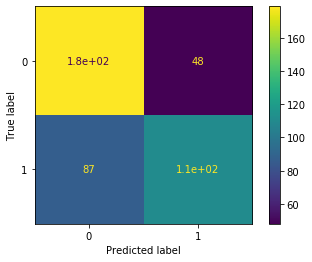

In [47]:
plot_confusion_matrix(logreg, X_test, y_test)

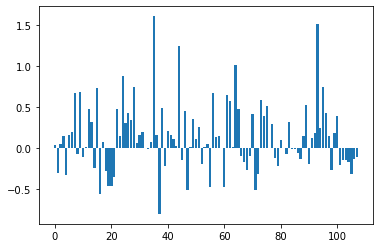

In [48]:
importance1 = logreg.coef_[0]
plt.bar([x for x in range(len(importance1))], importance1)
plt.show()

In [55]:
for i, v in enumerate(importance1):
    if abs(v) > 0.5:
        print(f'{X.columns[i]}, {v: .4f}')

SIM_GIPERT,  0.6501
ZSN_A,  0.6745
endocr_01,  0.8800
K_SH_POST,  1.6161
SVT_POST, -0.8550
GT_POST,  0.5307
IM_PG_P,  1.2781
ritm_ecg_p_04, -0.5288
n_r_ecg_p_06,  0.5790
n_p_ecg_p_03,  0.6745
n_p_ecg_p_04,  0.5735
n_p_ecg_p_06,  1.0495
fibr_ter_01, -0.5263
fibr_ter_03,  0.6070
fibr_ter_06,  0.5099
R_AB_3_n,  0.5262
NITR_S,  1.5120
NA_R_2_n,  0.7163


In [49]:
logreg2 = LogisticRegression(fit_intercept=False, solver='liblinear')
logreg2.fit(X_train2_trans, y_train2)
y2_hat_train = logreg2.predict(X_train2_trans)
y2_hat_test = logreg2.predict(X_test2_trans)

In [50]:
residuals_lr2 = np.abs(y_train2 - y2_hat_train)
print(residuals_lr2.value_counts(normalize=True))

0    0.76549
1    0.23451
Name: fatal_comp, dtype: float64


In [51]:
residuals_lr22 = np.abs(y_test2-y2_hat_test)
residuals_lr22.value_counts(normalize=True)

0    0.682353
1    0.317647
Name: fatal_comp, dtype: float64

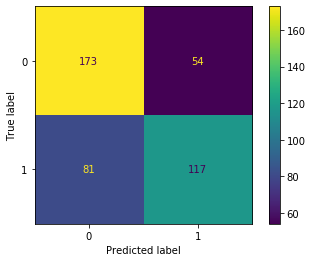

In [52]:
plot_confusion_matrix(logreg2, X_test2_trans, y_test2, values_format=".3g")

In [40]:
#cf2

In [53]:
from sklearn.svm import LinearSVC

In [54]:
svc = LinearSVC()
svc.fit(X_train, y_train)
y_hat_train3 = svc.predict(X_train)
y_hat_test3 = svc.predict(X_test)

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [55]:
residuals3 = np.abs(y_train - y_hat_train3)
print(residuals3.value_counts(normalize=True))

0    0.736471
1    0.263529
Name: fatal_comp, dtype: float64


In [56]:
residuals3 = np.abs(y_test-y_hat_test3)
residuals3.value_counts(normalize=True)

0    0.677647
1    0.322353
Name: fatal_comp, dtype: float64

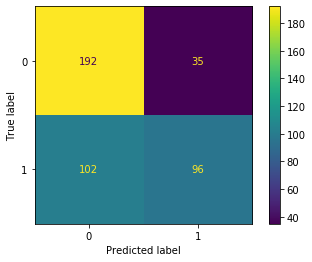

In [57]:
plot_confusion_matrix(svc, X_test, y_test, values_format=".3g")

In [58]:
from sklearn.naive_bayes import GaussianNB

In [59]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_hat_train2 = gnb.predict(X_train)
y_hat_test2 = gnb.predict(X_test)

In [60]:
residuals2 = np.abs(y_train - y_hat_train2)
print(residuals2.value_counts(normalize=True))

0    0.641569
1    0.358431
Name: fatal_comp, dtype: float64


In [61]:
residuals2 = np.abs(y_test-y_hat_test2)
residuals2.value_counts(normalize=True)

0    0.614118
1    0.385882
Name: fatal_comp, dtype: float64

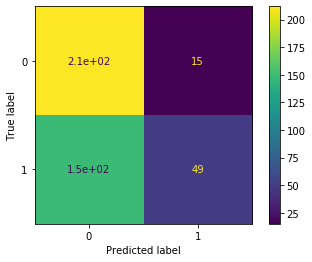

In [62]:
plot_confusion_matrix(gnb, X_test, y_test)

In [63]:
from xgboost import XGBClassifier

In [64]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_hat_train4 = xgb.predict(X_train)
y_hat_test4 = xgb.predict(X_test)

In [65]:
residuals4 = np.abs(y_train - y_hat_train4)
print(residuals4.value_counts(normalize=True))

0    0.838431
1    0.161569
Name: fatal_comp, dtype: float64


In [66]:
residuals4 = np.abs(y_test-y_hat_test4)
residuals4.value_counts(normalize=True)

0    0.743529
1    0.256471
Name: fatal_comp, dtype: float64

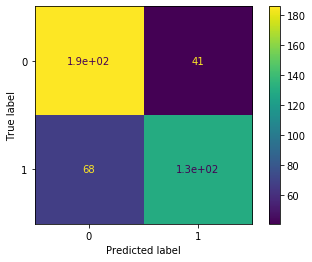

In [67]:
plot_confusion_matrix(xgb, X_test, y_test)

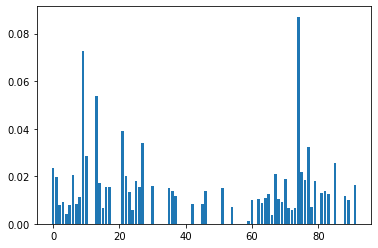

In [76]:
importance = xgb.feature_importances_
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [77]:
for i, v in enumerate(importance):
    if v > 0.015:
        print(f'{X.columns[i]}, {v: .4f}')

AGE,  0.0233
SEX,  0.0196
GB,  0.0204
ZSN_A,  0.0726
endocr_01,  0.0286
S_AD_ORIT,  0.0538
D_AD_ORIT,  0.0173
K_SH_POST,  0.0156
MP_TP_POST,  0.0155
ant_im,  0.0389
lat_im,  0.0202
IM_PG_P,  0.0178
ritm_ecg_p_01,  0.0153
ritm_ecg_p_02,  0.0340
ritm_ecg_p_07,  0.0160
n_r_ecg_p_04,  0.0151
n_p_ecg_p_12,  0.0151
TIME_B_S,  0.0208
R_AB_3_n,  0.0189
NITR_S,  0.0871
NA_R_1_n,  0.0219
NA_R_2_n,  0.0183
NA_R_3_n,  0.0323
NOT_NA_2_n,  0.0180
ASP_S_n,  0.0255
zab_leg,  0.0163


In [78]:
for i, v in enumerate(importance1):
    if abs(v) > 0.5:
        print(f'{X.columns[i]}, {v: .4f}')

SIM_GIPERT,  0.6501
ZSN_A,  0.6745
endocr_01,  0.8800
K_SH_POST,  1.6161
SVT_POST, -0.8550
GT_POST,  0.5307
IM_PG_P,  1.2781
ritm_ecg_p_04, -0.5288
n_r_ecg_p_06,  0.5790
n_p_ecg_p_03,  0.6745
n_p_ecg_p_04,  0.5735
n_p_ecg_p_06,  1.0495
fibr_ter_01, -0.5263
fibr_ter_03,  0.6070
fibr_ter_06,  0.5099
R_AB_3_n,  0.5262
NITR_S,  1.5120
NA_R_2_n,  0.7163
